<span style='font-size:150%'>데이터셋 준비 (10점) - 데이터 수집 과정을 반드시 기술</span>

파일명 : 2_Data collection.ipynb / Data set_1.csv (여러개의 파일을 준비한 경우 Data set_2.csv, Data set_3.csv ... )   

# 프로젝트 주제
주가 데이터를 기반으로 주가가 올랐냐 안 올랐냐를 예측한다.

과제 진행에 앞서 : 주가 예측은 굉장히 어렵지만, 그것을 시도해보는 것 자체에 의의가 있다고 생각한다.

=====================================================================================================================  
데이터 출처 : 네이버 증권

=====================================================================================================================  
데이터 수집 방법 선택  
1. BeautifulSoup, Selenium을 이용  
=> 효율성이 굉장히 떨어진다. 왜냐, 딥러닝을 위해서는 굉장히 많은 데이터가 필요한데,   
=> 여러개의 속성과 클래스를 하나하나 크롤링하기에는 너무나 비효율적이다.  
2. pandas에서 'read_html'을 이용  
3. 증권 회사 API 이용
  
=> 2를 선택
Why? : 필요한 데이터의 종류에 따라 데이터 수집 방법을 다르게 해야 한다.    

=====================================================================================================================   
주가 정보   
  
날짜, 종가, 전일비, 시가, 고가, 저가, 거래량  

=====================================================================================================================   
네이버 증권에서 주가 데이터를 확인할 수 있는 URL 구성  
'https://finance.naver.com/item/sise_day.nhn?code=' + 종목코드  
  
네이버 증권에서 주가 데이터를 확인할 수 있는 페이지에서 원하는 페이지의 URL 구성  
'http://finance.naver.com/item/sise_day.nhn?code=' + 종목코드 + '&page=' + 페이지넘버  
참고 : 한 페이지당 10일의 데이터가 있다.  
# 참고 : 광주과학기술원 인터넷 망으로는 네이버 증권에 대한 접속이 제한되니, 외부 인터넷이나 스마트폰 핫스팟을 사용할 것.

=====================================================================================================================   

# 코드시작

크롤링 부분은 블랙키위에서 '주식'이라는 키워드 검색하고 연관 키워드 크롤링해서 리스트에 저장하고    
주식 포함 모든 키워드에 대한 검색량을 크롤링해서 그래프나 시각화를 통해 보여주기

아니면 네이버에 '주식' 또는 '삼성'을 입력해서 맨 밑에 나오는 연관 검색어에 대해 위랑 똑같이 진행해보는 것도 낫뱃

=====================================================================================================================   
# 데이터 수집 과정

In [4]:
# pandas를 이용한 웹 크롤링

import pandas as pd

# 종목 코드를 입력하면 그에 해당하는 주가 정보를 보여주는 웹페이지의 URL을 반환한다.
# 원하는 기업의 종목 코드는 인터넷에 검색하면 쉽게 알아낼 수 있다.

def make_url():  
    code=input("종목 코드 입력 (ex : 삼성전자 005930) : ")
    url = 'http://finance.naver.com/item/sise_day.nhn?code='+code
    return url

In [7]:
# URL 생성
url = make_url()

data = pd.DataFrame()

# read_html 함수를 이용한 데이터 수집
# pandas에서 read_html를 이용하면 웹사이트에 게재된 데이터를 쉽게 크롤링하여 분석할 수 있다.
# 또한 별도의 크롤링 코드를 만들 필요가 없고 데이터를 정제하는 데에 시간이 들지 않는다.
# 따라서 시간을 효율적으로 사용할 수 있다.

# 1페이지부터 사용자가 입력한 페이지 넘버까지 read_html 함수를 사용해서 크롤링하는 함수
# 한 페이지당 10개의 데이터가 있다.
page_num=int(input("크롤링할 페이지 개수를 입력하세요. (64 이상 금지 : 삼성전자 2018년 5월 4일에 액면분할을 진행): "))
for page in range(1, page_num+1): 
    page_url = url+'&page='+str(page)
    data= data.append(pd.read_html(page_url, header=0)[0],ignore_index=True)

종목 코드 입력 (ex : 삼성전자 005930) : 005930
크롤링할 페이지 개수를 입력하세요. (64 이상 금지 : 삼성전자 2018년 5월 4일에 액면분할을 진행): 60


In [8]:
df=data

In [9]:
# 간혹가다가 주식 시장이 열리지 않거나 여러 사유로 인해 데이터가 빈 날이 있다. 이를 제거해줘야 한다. 
# df.dropna()를 이용해 데이터가 빈 행 제거 => dropna(axis=숫자)
# dropna(axis=0) : 행 제거
# dropna(axis=1) : 열 제거
# 데이터의 구조에 맞게 사용하면 된다.
# df = df.dropna(axis=0)

# 더 좋은 방법을 찾아서 아래의 방법을 사용함.

# pandas로 데이터를 크롤링하는 과정에서 빈 열이 발생하는 것을 확인했음.
# incplace=True를 사용하면 df에 바로 적용됨.
df.dropna(inplace=True)

# 빈 열이 발생하기 때문에 해당 열은 제거해준다.
df.reset_index(inplace=True, drop=True)

In [10]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,2020.12.14,73800.0,400.0,73600.0,74500.0,73200.0,21453578.0
1,2020.12.11,73400.0,500.0,73500.0,73800.0,73100.0,18486672.0
2,2020.12.10,72900.0,1000.0,72700.0,73800.0,72500.0,39882928.0
3,2020.12.09,73900.0,2200.0,72100.0,73900.0,72000.0,24077996.0
4,2020.12.08,71700.0,1200.0,72200.0,72900.0,71600.0,25000338.0
...,...,...,...,...,...,...,...
595,2018.07.16,46050.0,450.0,46800.0,46800.0,46000.0,7678719.0
596,2018.07.13,46500.0,1000.0,45800.0,46500.0,45750.0,11543389.0
597,2018.07.12,45500.0,500.0,45900.0,46250.0,45450.0,11828104.0
598,2018.07.11,46000.0,300.0,46400.0,46450.0,45400.0,11224077.0


In [11]:
# 주가 예측은 과거의 데이터로부터 미래를 예측하는 것이다. 따라서 순서도 이에 맞춰줘야 한다.
# 이러한 데이터를 시계열 데이터라고 한다.
df= df.sort_values(by=['날짜'], ascending=True)

In [12]:
# 과거순으로 정렬된 것을 확인
df.head()

,날짜,종가,전일비,시가,고가,저가,거래량
599,2018.07.10,46300.0,700.0,46200.0,46550.0,46100.0,10528665.0
598,2018.07.11,46000.0,300.0,46400.0,46450.0,45400.0,11224077.0
597,2018.07.12,45500.0,500.0,45900.0,46250.0,45450.0,11828104.0
596,2018.07.13,46500.0,1000.0,45800.0,46500.0,45750.0,11543389.0
595,2018.07.16,46050.0,450.0,46800.0,46800.0,46000.0,7678719.0


In [13]:
# pandas의 함수를 이용하여 날짜데이터로 전환

df['날짜']=pd.to_datetime(df['날짜'],format='%Y.%m.%d')
df

,날짜,종가,전일비,시가,고가,저가,거래량
599,2018-07-10,46300.0,700.0,46200.0,46550.0,46100.0,10528665.0
598,2018-07-11,46000.0,300.0,46400.0,46450.0,45400.0,11224077.0
597,2018-07-12,45500.0,500.0,45900.0,46250.0,45450.0,11828104.0
596,2018-07-13,46500.0,1000.0,45800.0,46500.0,45750.0,11543389.0
595,2018-07-16,46050.0,450.0,46800.0,46800.0,46000.0,7678719.0
...,...,...,...,...,...,...,...
4,2020-12-08,71700.0,1200.0,72200.0,72900.0,71600.0,25000338.0
3,2020-12-09,73900.0,2200.0,72100.0,73900.0,72000.0,24077996.0
2,2020-12-10,72900.0,1000.0,72700.0,73800.0,72500.0,39882928.0
1,2020-12-11,73400.0,500.0,73500.0,73800.0,73100.0,18486672.0


# 주가 추이

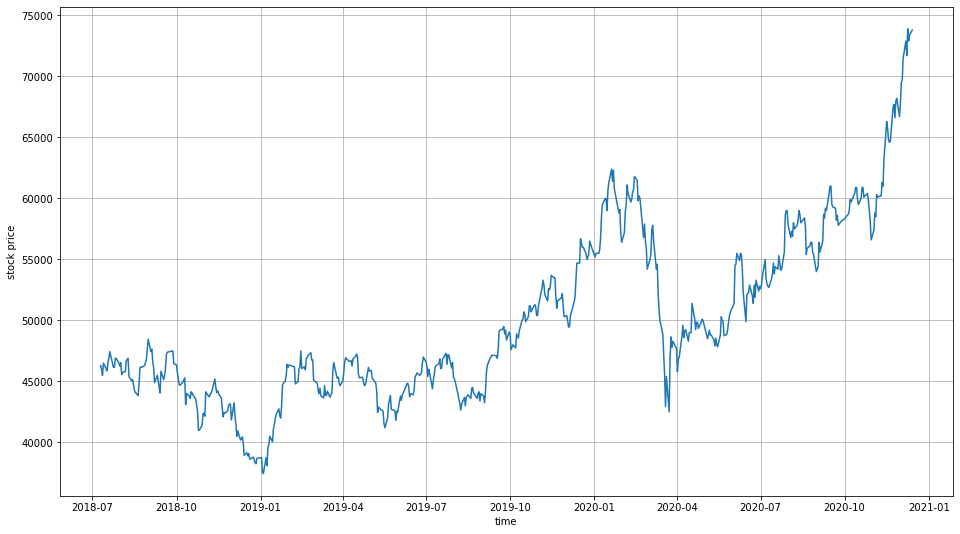

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,9))
sns.lineplot(y=df['종가'],x=df['날짜'])
plt.xlabel('time')
plt.ylabel('stock price')
plt.grid()

plt.show()

※ 그래프 보고 너무 급격한 경사나 가로로 긴 선이 있는지 없는지 확인 ※  

급격한 하락 => 액면 분할   
가로로 긴 선 => 거래 정지    

이런 경우는 좋은 데이터가 아니기 때문에 해당 기간을 피하든지, 다른 종목으로 딥러닝 진행

In [15]:
columns=['시가','고가','저가','거래량','종가'] 
df_2=df[columns]

In [20]:
df_2

,시가,고가,저가,거래량,종가
599,46200.0,46550.0,46100.0,10528665.0,46300.0
598,46400.0,46450.0,45400.0,11224077.0,46000.0
597,45900.0,46250.0,45450.0,11828104.0,45500.0
596,45800.0,46500.0,45750.0,11543389.0,46500.0
595,46800.0,46800.0,46000.0,7678719.0,46050.0
...,...,...,...,...,...
4,72200.0,72900.0,71600.0,25000338.0,71700.0
3,72100.0,73900.0,72000.0,24077996.0,73900.0
2,72700.0,73800.0,72500.0,39882928.0,72900.0
1,73500.0,73800.0,73100.0,18486672.0,73400.0


# 데이터 저장(for 4_Deep learning_exception)

In [21]:
file_name=input("검색 결과를 csv 타입으로 저장할 경로와 파일명은? (예 : D:\\ai\\Final\\Data set_exception.csv) : ")

df_2.to_csv(file_name,encoding='utf-8-sig',index=False)

검색 결과를 csv 타입으로 저장할 경로와 파일명은? (예 : D:\ai\Final\Data set_exception.csv) : D:\ai\Final\Data set_exception.csv


# 데이터 전처리

In [22]:
import numpy as np

In [23]:
columns=['종가','시가','고가','저가','거래량'] 
df_3=df[columns]

In [24]:
df_3['종가']

599    46300.0
598    46000.0
597    45500.0
596    46500.0
595    46050.0
        ...   
4      71700.0
3      73900.0
2      72900.0
1      73400.0
0      73800.0
Name: 종가, Length: 600, dtype: float64

In [25]:
close=np.array(df_2['종가'])

In [26]:
close

array([46300., 46000., 45500., 46500., 46050., 45850., 46550., 46900.,
       47450., 46500., 46150., 46150., 46900., 46900., 46500., 46250.,
       46550., 45550., 45750., 45800., 46700., 46800., 46900., 45400.,
       45050., 45150., 44250., 44100., 43850., 44800., 46100., 46200.,
       46150., 46300., 46550., 46800., 47650., 48450., 47450., 47650.,
       46600., 46100., 44900., 45500., 45050., 44550., 44050., 45850.,
       45150., 45500., 46150., 47250., 47400., 47500., 46450., 46350.,
       45700., 44700., 44700., 44950., 45300., 43100., 44000., 43800.,
       43600., 44150., 44050., 43900., 43550., 43050., 42550., 41000.,
       41000., 41400., 42350., 42400., 42150., 44150., 43800., 43750.,
       44000., 44050., 44300., 45200., 44500., 44100., 44250., 44000.,
       43650., 42800., 42100., 42450., 42400., 42600., 43050., 43150.,
       43150., 41850., 43250., 42150., 41450., 40500., 40950., 40200.,
       40250., 40450., 40000., 38950., 39150., 38900., 39100., 38650.,
      

In [27]:
len(close)

600

In [28]:
Diff=[]
Diff.append('시작')
for i in range(len(close)-1):
    d2=close[i+1]
    d1=close[i]
    if((d2-d1)>0):
        Diff.append('주가 상승')
    else:
        Diff.append('주가 하락 또는 변동 없음') # 데이터를 0 또는 1로 하기 위함 + 단순히 오르냐 안 오르냐를 보는 것이 목적이기 때문
Diff

['시작',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 상승',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 상승',
 '주가 상승',
 '주가 상승',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 상승',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 상승',
 '주가 상승',
 '주가 상승',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 상승',
 '주가 상승',
 '주가 상승',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 상승',
 '주가 하락 또는 변동 없음',
 '주가 하락 또는 변동 없음',
 '주가 하락 

In [29]:
len(Diff)

600

In [30]:
df_3['변동']=Diff

C:\anaconda\envs\ai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_3

,종가,시가,고가,저가,거래량,변동
599,46300.0,46200.0,46550.0,46100.0,10528665.0,시작
598,46000.0,46400.0,46450.0,45400.0,11224077.0,주가 하락 또는 변동 없음
597,45500.0,45900.0,46250.0,45450.0,11828104.0,주가 하락 또는 변동 없음
596,46500.0,45800.0,46500.0,45750.0,11543389.0,주가 상승
595,46050.0,46800.0,46800.0,46000.0,7678719.0,주가 하락 또는 변동 없음
...,...,...,...,...,...,...
4,71700.0,72200.0,72900.0,71600.0,25000338.0,주가 하락 또는 변동 없음
3,73900.0,72100.0,73900.0,72000.0,24077996.0,주가 상승
2,72900.0,72700.0,73800.0,72500.0,39882928.0,주가 하락 또는 변동 없음
1,73400.0,73500.0,73800.0,73100.0,18486672.0,주가 상승


In [32]:
# '변동'이라는 클래스는 당일 종가와 전날의 종가를 뺀 값이기 때문에 2018년 12월 4일의 '변동' 데이터는 알 수 없으므로 제외시켜준다.  
df_4=df_3[1:][:]

=====================================================================================================================   
# 데이터 저장

In [33]:
file_name=input("검색 결과를 csv 타입으로 저장할 경로와 파일명은? (예 : D:/ai/Final/Data set_1.csv) : ")

df_4.to_csv(file_name,encoding='utf-8-sig',index=False)

검색 결과를 csv 타입으로 저장할 경로와 파일명은? (예 : D:/ai/Final/Data set_1.csv) : D:/ai/Final/Data set_1.csv
